<a href="https://colab.research.google.com/github/ferjozsot23/machine-learning/blob/main/Feature_selection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Comprender la importancia de la relevancia de las variables de un dataset con la variable target
1. Seleccionar las características más importantes a través de tres métodos

# Introducción
La selección de características es un paso fundamental para el proceso de creación de un modelo de aprendizaje autónomo ya que no solo tiene un gran impacto en el rendimiento del programa, sino que permite lograr predicciones más acertadas basandose en las variables previamente seleccionadas.

En este paso, se eliman variables que no representan un valor significativo para el modelo. Dentro de este enfoque, variables redundantes e irrelevantes son eliminadas. La manera en como se llega a determinar el grado de importancia es mediante diferentes métodos que permiten descartar o prevalecer características.

# Ejercicios presentados

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("LaptopSales.csv")
data.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0


## Importancia de la característica

In [ ]:
data.shape

(283787, 16)

In [ ]:
data = data.rename(columns={'Retail Price': 'Price'})

In [ ]:
X = data.iloc[:,5:10]   # independent columns
y = data.iloc[:]['Price']    # target feature es High Bid

In [ ]:
X

,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB)
0,15,5,1,2.0,80
1,15,6,1,2.0,300
2,15,4,1,2.0,300
3,15,5,1,2.0,40
4,15,6,2,2.0,120
...,...,...,...,...,...
297567,17,5,4,2.0,300
297568,17,6,1,1.5,80
297569,15,6,2,2.4,300
297570,15,4,4,1.5,120


In [ ]:
y

0         455.0
1         545.0
2         515.0
3         395.0
4         585.0
          ...  
297567      NaN
297568    392.0
297569    441.0
297570    406.0
297571    530.0
Name: Price, Length: 297572, dtype: float64

In [ ]:
data.iloc[:,5:10].dtypes

Screen Size (Inches)        int64
Battery Life (Hours)        int64
RAM (GB)                    int64
Processor Speeds (GHz)    float64
HD Size (GB)                int64
dtype: object

In [ ]:
data.dropna()

,Date,Configuration,Customer Postcode,Store Postcode,Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y,Wireless_Yes
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,80,Yes,532041,180995,534057.0,179682.0,1
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,300,No,529240,175537,528739.0,173080.0,0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,300,Yes,533095,181047,535652.0,182961.0,1
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,40,Yes,529902,179641,534057.0,179682.0,0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,120,Yes,531684,180948,528924.0,178440.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297566,12/30/2008 23:54,854,SW19 3NW,SW12 9HD,780.0,17,6,4,2.4,120,No,524772,169692,528739.0,173080.0,1
297568,12/30/2008 23:55,731,N13 4JD,N3 1DH,392.0,17,6,1,1.5,80,Yes,531165,192973,525109.0,190628.0,0
297569,12/30/2008 23:57,375,SE25 6EF,CR7 8LE,441.0,15,6,2,2.4,300,Yes,534086,168521,532714.0,168302.0,1
297570,12/30/2008 23:58,101,SW8 1LA,SW1P 3AU,406.0,15,4,4,1.5,120,Yes,530716,177488,529902.0,179641.0,1


In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data = data.dropna()

In [ ]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class

[0.21662732 0.16223376 0.38773106 0.06057864 0.17282922]


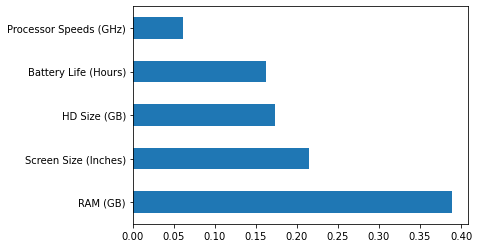

In [ ]:
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Selección univariada

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  ##chi2

In [ ]:
data.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0


In [ ]:
data.shape

(283787, 16)

In [ ]:
X = data.iloc[:,5:10]   # independent columns
y = data.iloc[:]['Price']    # target feature es Price

In [ ]:
X

,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB)
0,15,5,1,2.0,80
1,15,6,1,2.0,300
2,15,4,1,2.0,300
3,15,5,1,2.0,40
4,15,6,2,2.0,120
...,...,...,...,...,...
297566,17,6,4,2.4,120
297568,17,6,1,1.5,80
297569,15,6,2,2.4,300
297570,15,4,4,1.5,120


In [ ]:
y

0         455.0
1         545.0
2         515.0
3         395.0
4         585.0
          ...  
297566    780.0
297568    392.0
297569    441.0
297570    406.0
297571    530.0
Name: Price, Length: 283787, dtype: float64

In [ ]:
#apply SelectKBest class to extract top k best features, para todas: k='all'
#bestfeatures = SelectKBest(score_func=chi2, k=5)
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
print(scores.nlargest(8,'score'))

                    specs         score
2                RAM (GB)  90197.702146
0    Screen Size (Inches)  50075.863551
4            HD Size (GB)  18472.514536
1    Battery Life (Hours)  15999.261411
3  Processor Speeds (GHz)  10964.154993


##  Matriz de correlación con mapa de calor

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = data.iloc[:,5:10]   # independent columns
y = data.iloc[:]['Price']    # target feature es Price

In [ ]:
X

,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB)
0,15,5,1,2.0,80
1,15,6,1,2.0,300
2,15,4,1,2.0,300
3,15,5,1,2.0,40
4,15,6,2,2.0,120
...,...,...,...,...,...
297567,17,5,4,2.0,300
297568,17,6,1,1.5,80
297569,15,6,2,2.4,300
297570,15,4,4,1.5,120


In [ ]:
y

0         455.0
1         545.0
2         515.0
3         395.0
4         585.0
          ...  
297567      NaN
297568    392.0
297569    441.0
297570    406.0
297571    530.0
Name: Price, Length: 297572, dtype: float64

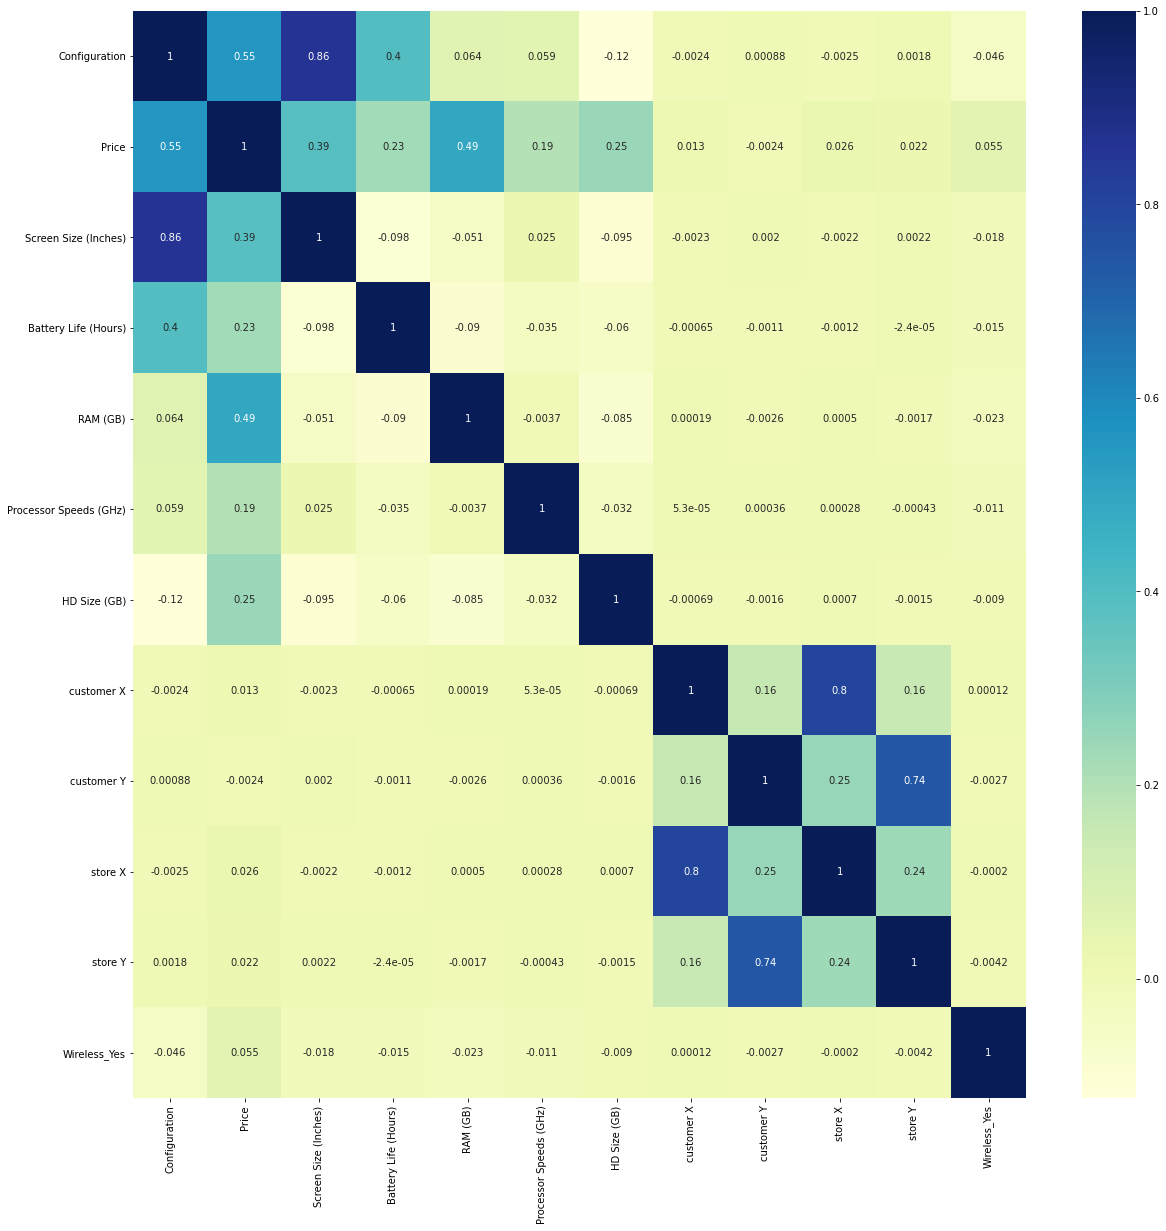

In [ ]:
#get the correlations of each feature in the dataset
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

# Conclusiones

1. Se concluye que la selección de caracterísiticas permite determinar aquellas variables más relevantes dentro de un data frame
1. Se determina que los tres métodos logran seleccionar las características más relevantes

# Bibliografía

Gupta, A. (10 de Octubre de 2020). eature Selection Techniques in Machine Learning. Obtenido de https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

